In [1]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = 8
encoding_dim = 5
input_img = Input(shape=(input_dim,))

# layers
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='relu')(encoded)

# models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

Using TensorFlow backend.


In [2]:
from dataset import load_normalized_dataset
import numpy as np
from random import choice

# features = [
#     'Number of times pregnant',
#     'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
#     'Diastolic blood pressure (mm Hg)',
#     'Age (years)',
# ]
features = None

x_train, x_test, y_train, y_test = load_normalized_dataset(features)

# add random positive instance in order to balance the positive and negative samples
ones = x_train[y_train == 1]
for _ in range(200):
    x_train = np.append(x_train, [choice(ones)], axis=0)
    y_train = np.append(y_train, 1)


print x_train.shape
print x_test.shape

(814, 8)
(154, 8)


In [3]:
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)

(814, 8) (814, 5)


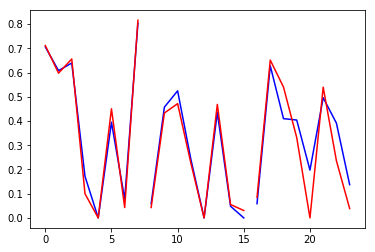

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

print x_train.shape, encoded_imgs.shape

n = 3
l = 8
for j in range(n):
    i = randint(0, x_train.shape[0])
    plt.plot(range(j*l, (j+1)*l), x_train[i], 'b')
    plt.plot(range(j*l, (j+1)*l), decoded_imgs[i], 'r')
plt.show() # This plot shows how much test and decoded data are alike

In [5]:
encoded_input = Input(shape=(encoding_dim,))
final_layer = Dense(encoding_dim, activation='relu')(encoded_input)
final_layer = Dense(1, activation='sigmoid')(final_layer)

mlp_model = Model(encoded_input, final_layer)
mlp_model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp_model.fit(encoded_imgs,
              y_train,
              epochs=500,
              batch_size=256,
              shuffle=True,
              verbose=0)
print 'Loss = %.4f' % mlp_model.evaluate(encoded_imgs, y_train, verbose=0)[0]

Loss = 0.1819


In [6]:
from util import R2
from sklearn.metrics import precision_recall_fscore_support

encoded_x_test = encoder.predict(x_test)
y_pred = mlp_model.predict(encoded_x_test)

a = y_pred.flatten()
b = y_test

print 'R2 Error = %.2f' % R2(a, b)

a = [0 if i < 0.5 else 1 for i in a]
b = [0 if i < 0.5 else 1 for i in b]
precision, recal, f_score, support = precision_recall_fscore_support(a, b, average='macro')
print 'Precision = %.4f' % precision
print 'Recal = %.4f' % recal
print 'F-Score = %.4f' % f_score

R2 Error = 0.19
Precision = 0.7302
Recal = 0.7232
F-Score = 0.7235


In [7]:
print 'Any (a)=', np.any(a)
print 'Any (b)=', np.any(b)
for x, y in zip(a,b):
    print x, y, '*' if x != y else ''

Any (a)= True
Any (b)= True
0 0 
1 0 *
0 1 *
0 0 
1 0 *
0 0 
0 0 
1 1 
0 0 
1 1 
0 0 
1 1 
1 0 *
0 0 
0 0 
1 1 
0 1 *
0 0 
0 0 
0 1 *
0 0 
0 0 
1 0 *
0 0 
0 1 *
0 0 
0 0 
0 0 
0 0 
0 0 
1 0 *
1 1 
1 1 
0 0 
1 0 *
1 1 
0 1 *
1 0 *
1 1 
1 1 
0 0 
0 1 *
0 0 
0 0 
1 1 
0 0 
0 0 
1 1 
0 0 
0 0 
1 0 *
0 0 
0 0 
0 0 
1 1 
1 0 *
1 0 *
1 1 
1 0 *
0 0 
0 0 
1 0 *
0 0 
1 1 
0 0 
0 0 
1 1 
0 0 
0 0 
0 1 *
0 0 
0 0 
1 0 *
0 0 
0 0 
1 0 *
0 0 
0 0 
1 0 *
0 0 
0 0 
0 0 
0 0 
0 0 
1 1 
0 0 
0 0 
0 0 
1 1 
1 0 *
0 1 *
0 0 
0 0 
0 0 
0 1 *
1 0 *
1 1 
1 1 
0 0 
0 0 
1 0 *
1 0 *
0 0 
0 0 
0 0 
0 0 
0 0 
0 1 *
0 0 
0 0 
0 1 *
1 1 
0 0 
0 0 
0 0 
0 0 
0 0 
1 1 
0 0 
1 1 
0 0 
1 1 
1 0 *
0 0 
0 1 *
0 0 
1 0 *
1 1 
1 0 *
0 0 
1 0 *
1 1 
0 0 
0 0 
0 0 
0 0 
0 0 
0 1 *
1 0 *
0 0 
1 1 
0 0 
0 1 *
1 1 
0 0 
1 1 
0 0 
1 1 
0 1 *
1 1 
1 1 
1 0 *
0 0 
0 1 *
